Data ingestion 
esc y t covert in code 
esc m to convert in markdown 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Pradosh\Downloads\50_Startups (1).csv"

In [3]:
df = pd.read_csv(path)

In [5]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [8]:
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
df.shape

(50, 5)

In [10]:
#quality checks 

df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

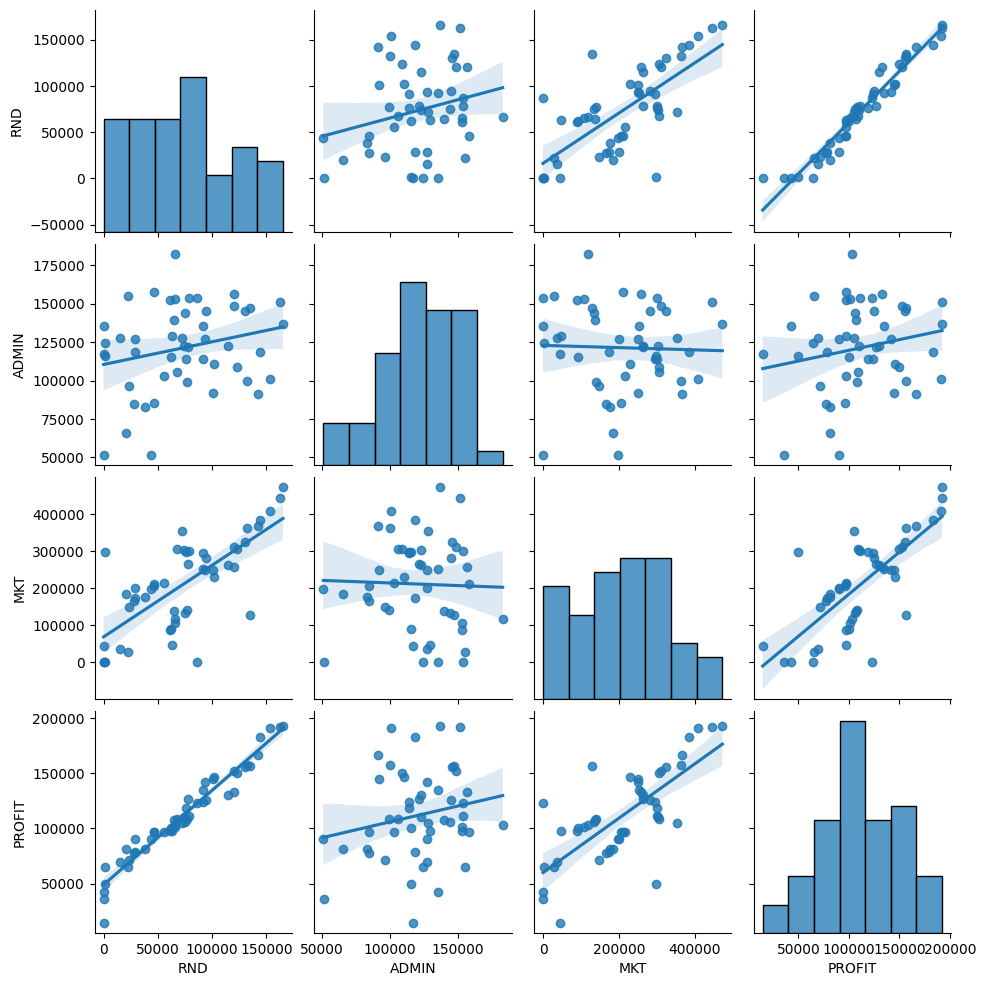

In [13]:
#visualize data when necassary 
sns.pairplot(df, kind ='reg')

In [14]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='RND', ylabel='PROFIT'>

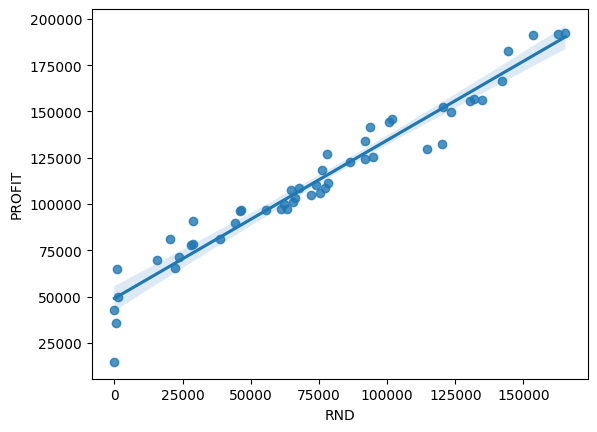

In [15]:
sns.regplot(df , x = "RND" , y = "PROFIT")

In [20]:
# sepearte x and y double square bracket for dataframe 
x = df[["RND"]]
y = df[["PROFIT"]]

x.head()
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
# train test split 
from sklearn.model_selection import train_test_split 

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state = 34 )

In [32]:
x_train.head()

,RND
9,123334.88
37,44069.95
48,542.05
47,0.00
22,73994.56


In [31]:
x_train.shape

(40, 1)

In [33]:
x_test.head()

,RND
16,78013.11
39,38558.51
1,162597.70
3,144372.41
0,165349.20


In [29]:
x_test.shape

(10, 1)

In [37]:
print(y_train.head())
print(y_test.head())
print(y_test.shape)
print(y_train.shape)

       PROFIT
9   149759.96
37   89949.14
48   35673.41
47   42559.73
22  110352.25
       PROFIT
16  126992.93
39   81005.76
1   191792.06
3   182901.99
0   192261.83
(10, 1)
(40, 1)


In [38]:
df.corr(numeric_only = True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [39]:
#fit model 
from sklearn.linear_model import LinearRegression 

In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
#check score 
#training score 
model.score(x_train , y_train)


0.9300367196419655

In [44]:
#testing score 
model.score(x_test , y_test)

0.9592157645546188

In [49]:
# model evaluation 
from sklearn.metrics import mean_squared_error , \
root_mean_squared_error , mean_absolute_percentage_error , r2_score

In [50]:
y_test_pred = model.predict(x_test)
(y_test_pred)


array([[114923.33595397],
       [ 81827.56382264],
       [185875.57768146],
       [170587.62532946],
       [188183.62330908],
       [158781.67206184],
       [101486.40012554],
       [128219.35643258],
       [104889.57418808],
       [162403.18564697]])

In [51]:
y_train_pred = model.predict(x_train)
(y_train_pred)


array([[152940.67670786],
       [ 86450.73481805],
       [ 49938.14921953],
       [ 49483.46045615],
       [111552.44852643],
       [128884.89395081],
       [ 49483.46045615],
       [178195.07457584],
       [ 50322.48516198],
       [106131.89243447],
       [114110.42408127],
       [112671.7101515 ],
       [ 88427.12313865],
       [126649.600203  ],
       [134971.39020025],
       [145549.5034579 ],
       [109969.60652117],
       [150598.35641393],
       [ 73527.53312162],
       [ 50586.91010227],
       [100766.59857982],
       [121975.0507614 ],
       [ 68086.85345539],
       [ 62490.15946741],
       [102672.8270108 ],
       [113447.62115463],
       [ 66452.68333384],
       [103726.27389484],
       [ 73603.50611544],
       [126445.57115048],
       [104515.42166337],
       [150095.66130809],
       [133930.29930825],
       [160105.99450252],
       [ 88081.48250596],
       [168687.61264193],
       [115239.03868063],
       [ 72880.92803654],
       [ 693

In [ ]:
#create function evaluate
def evaluate(model  ,  x, y):
    y_pred  =  model.predict(x)
    MSE  =  mean_squared_error(y ,  y_pred)
    MAE  =  mean_absolute_error(y , y_pred)
    RMSE  =  root_mean_squared_error(y , y_pred)
    r2_score_ =  r2_score(y , y_pred)
    MAPE  =  mean_absolute_percentage_error(y , y_pred)
 
 
 #print outputs 
    print(f"MSE -->{MSE}")
    print(f"RMSE -->{RMSE}")
    print(f"MAPE -->{MAPE}")
    print(f"MAE -->{MAE}")
    print(f"r2_score_ -->{r2_score_}")


In [ ]:
rnd = 30000
model.predict([[rnd]])



[[74648.41369201]]


c:\Users\Pradosh\OneDrive\Documents\ML FOLDER\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
